In [6]:
import numpy as np
import time
import PIL.Image as Image
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
print(tf.version.VERSION)

2.6.0


In [31]:
model = keras.models.load_model('./model224x224MobileNetV2/saved-model-e10.hdf5',custom_objects={'KerasLayer': hub.KerasLayer})

In [27]:
class_names= ['1WayConnectorforFoley','2WayConnectorforFoley','2WayFoleyCatheter'
,'3WayConnectorforFoley','3Waystopcock','AlcoholBottle','AlcoholPad'
,'CottonBall','CottonSwap','Dilator','DisposableInfusionSet'
,'ExtensionTube','FaceShield','FootWear','FrontLoadSyringe','GauzePad'
,'Glove','GuideWire','LiquidBottle','Mask','NGTube','NasalCannula'
,'Needle','OxygenMask','PPESuit','PharmaceuticalProduct','Pill'
,'PillBottle','PrefilledHumidifier','PressureConnectingTube'
,'ReusableHumidifier','SodiumChlorideBag','SterileHumidifierAdapter'
,'SurgicalBlade','SurgicalCap','SurgicalSuit','Syringe','TrachealTube'
,'UrineBag','Vaccinebottle','WingedInfusionSet']

In [12]:
img_height = 224
img_width = 224

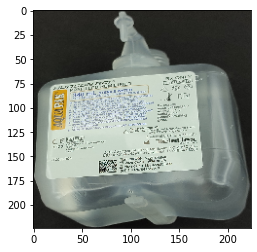

28
Predict -> PrefilledHumidifier with a 99.07 percent confidence.


In [56]:
test_img1 = tf.keras.utils.load_img('./test_image/PrefilledHumidifier_11.png', target_size=(img_height, img_width))
plt.imshow(test_img1)
plt.show()
img_array = tf.keras.utils.img_to_array(test_img1).astype('float32')/255
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
#print(predictions)
score = tf.nn.softmax(predictions[0])
print(np.argmax(score).item())
print(
    "Predict -> {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score).item()], 100 * np.max(score))
)